In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [23]:
# importing the dataset
data=pd.read_csv(r"H:\My Drive\dsai projects\Walmart\Walmart.csv")

In [24]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [26]:
data['Date'] = pd.to_datetime(data['Date'])
# to_datetime()---> used to convert column into datetime format

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [28]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [29]:
# Check for missing values
missing_values = data.isnull().sum()

In [30]:
missing_values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [31]:
# Explore data using descriptive statistics and visualizations
summary_statistics = data.describe()
correlation_matrix = data.corr()

In [32]:
summary_statistics

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [33]:
correlation_matrix

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

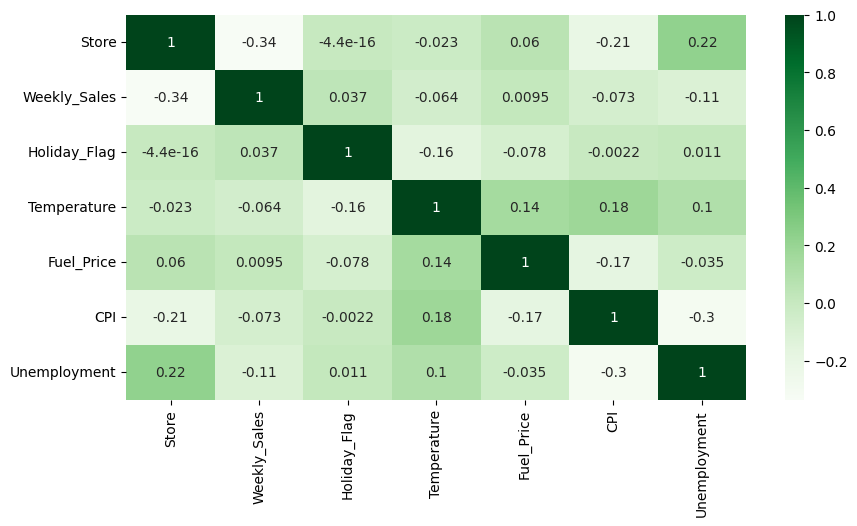

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap="Greens",annot=True)

In [35]:
data.duplicated().sum()

0

In [36]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [37]:
 #Extract features from the 'Date' column
data['DayOfMonth'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday is 0, Sunday is 6
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['Quarter'] = data['Date'].dt.quarter

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfMonth,Month,Year,DayOfWeek,WeekOfYear,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010,6,17,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010,3,48,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,4,7,1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4,8,1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010,0,18,2


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   DayOfMonth    6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
 11  DayOfWeek     6435 non-null   int64         
 12  WeekOfYear    6435 non-null   UInt32        
 13  Quarter       6435 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(7)
memory usage: 685.1 KB


In [39]:
# Determine the Sales grouped by Week of Year
Sales_Trend = data.groupby('WeekOfYear')['WeekOfYear', 'Weekly_Sales'].sum()
Sales_Trend.head()

,WeekOfYear,Weekly_Sales
WeekOfYear,,
1,180,1.815590e+08
2,180,8.269676e+07
3,270,8.273564e+07
4,360,7.943483e+07
5,675,1.462024e+08


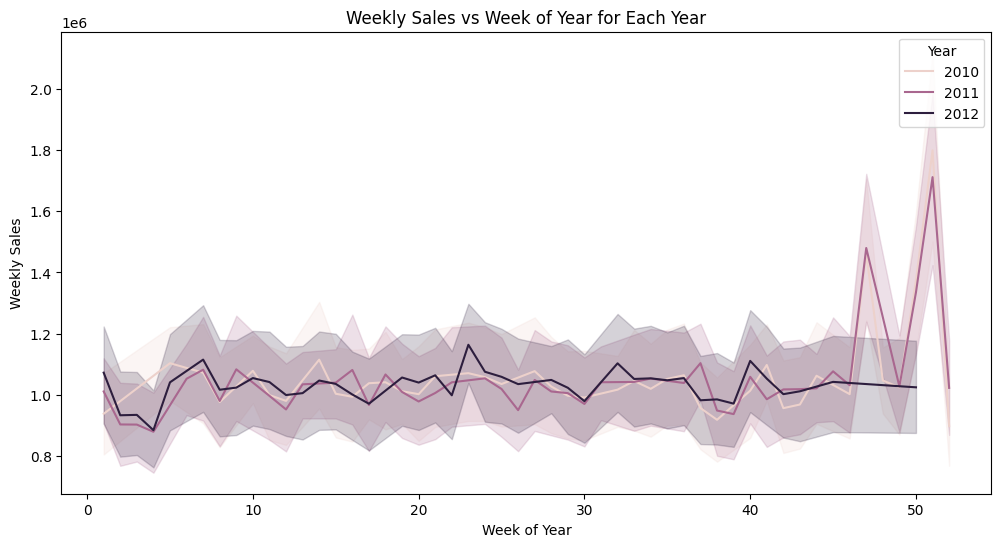

In [40]:
# Convert 'WeekOfYear' to int
data['WeekOfYear'] = data['WeekOfYear'].astype(int)
# Convert 'Weekly_Sales' to numeric (if not already)
data['Weekly_Sales'] = pd.to_numeric(data['Weekly_Sales'], errors='coerce')

# Plotting Weekly_Sales vs WeekOfYear for each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='WeekOfYear', y='Weekly_Sales', hue='Year', data=data)
plt.title('Weekly Sales vs Week of Year for Each Year')
plt.xlabel('Week of Year')
plt.ylabel('Weekly Sales')
plt.show()


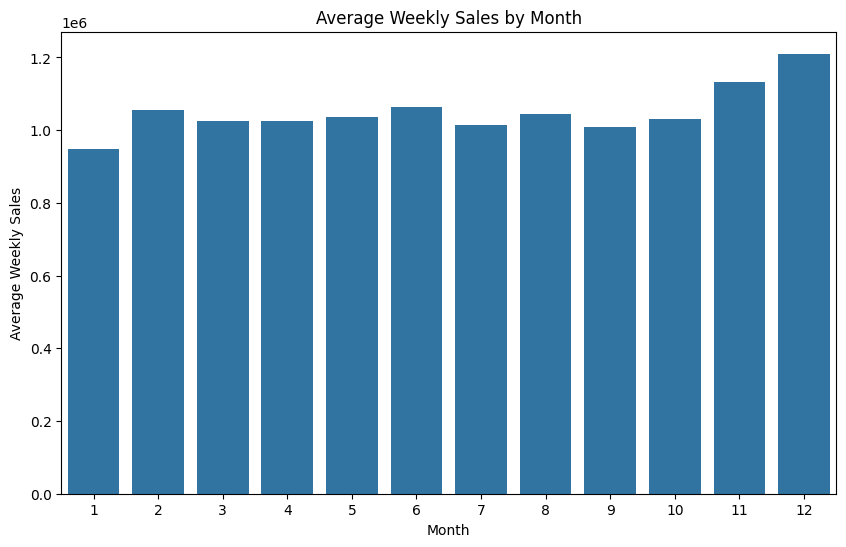

In [41]:
# Create a new DataFrame to store average weekly sales by month
average_sales_by_month = data.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Plotting bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=average_sales_by_month)
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

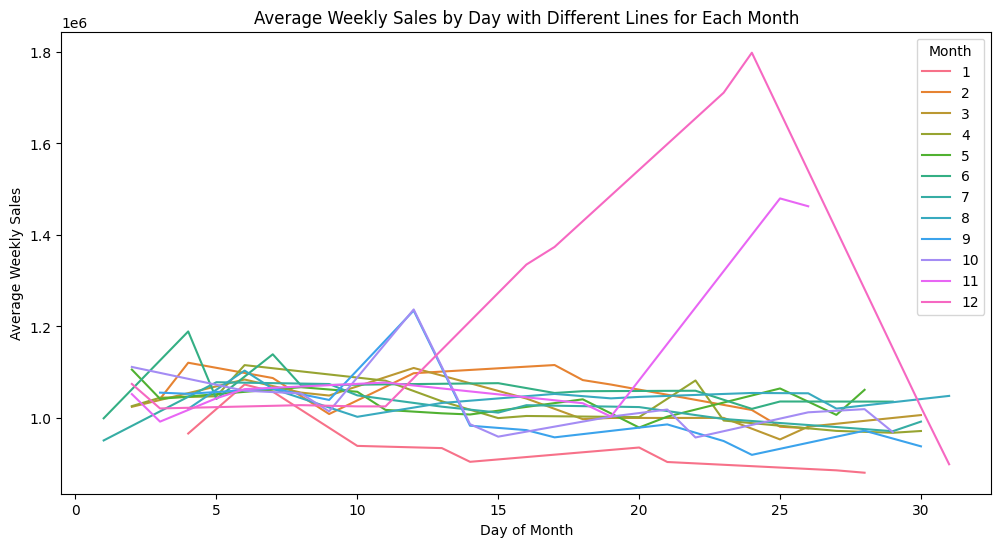

In [42]:
# Assuming 'DayOfMonth', 'Month', and 'Weekly_Sales' columns are present in your DataFrame

# Create a new DataFrame to store average weekly sales by day and month
average_sales_by_day_month = data.groupby(['DayOfMonth', 'Month'])['Weekly_Sales'].mean().reset_index()

palette = sns.color_palette('husl', n_colors=12)  
# Plotting line plot with different lines for each month
plt.figure(figsize=(12, 6))
sns.lineplot(x='DayOfMonth', y='Weekly_Sales', hue='Month', data=average_sales_by_day_month, palette=palette)
plt.title('Average Weekly Sales by Day with Different Lines for Each Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Weekly Sales')
plt.show()



In [43]:
# Use correlation analysis
correlation_unemployment_sales = data.groupby('Store')['Unemployment', 'Weekly_Sales'].corr()


In [44]:
correlation_unemployment_sales

Unemployment  Weekly_Sales
Store                                         
1     Unemployment      1.000000     -0.097955
      Weekly_Sales     -0.097955      1.000000
2     Unemployment      1.000000      0.066325
      Weekly_Sales      0.066325      1.000000
3     Unemployment      1.000000     -0.230413
...                          ...           ...
43    Weekly_Sales     -0.201954      1.000000
44    Unemployment      1.000000     -0.780076
      Weekly_Sales     -0.780076      1.000000
45    Unemployment      1.000000     -0.004041
      Weekly_Sales     -0.004041      1.000000

[90 rows x 2 columns]

In [45]:
from statsmodels.tsa.stattools import adfuller
#p-value > 0.05: ---> not stationary -> Null Hyp
#p-value <= 0.05: --> stationary-> Alternate Hyp
result = adfuller(data['Weekly_Sales'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
	print('not stationary')
else:
	print("stationary")

(-4.624149498578307, 0.00011655869699901116, 34, 6400, {'1%': -3.4313721757424656, '5%': -2.8619917128968813, '10%': -2.5670104435791017}, 171522.33418043077)
ADF Statistic: -4.624149
p-value: 0.000117
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
stationary


<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

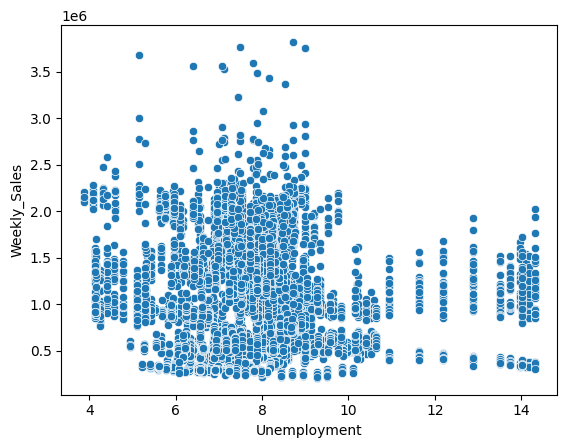

In [46]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)

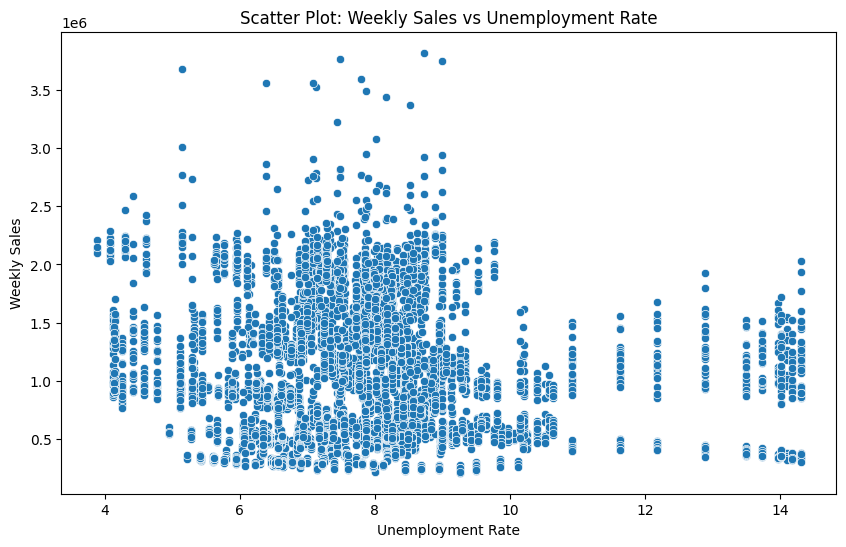

Correlation between Weekly Sales and Unemployment Rate: -0.10617608965795419


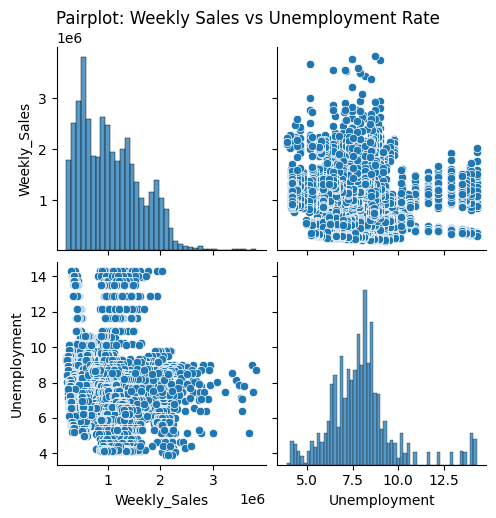

In [47]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Scatter Plot: Weekly Sales vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation analysis
correlation = data['Weekly_Sales'].corr(data['Unemployment'])
print(f'Correlation between Weekly Sales and Unemployment Rate: {correlation}')

# Pairplot for a more comprehensive view
sns.pairplot(data[['Weekly_Sales', 'Unemployment']])
plt.suptitle('Pairplot: Weekly Sales vs Unemployment Rate', y=1.02)
plt.show()


In [48]:
# Assuming 'Store', 'Weekly_Sales', and 'Unemployment' columns are present in your DataFrame

# Get a list of unique store numbers
unique_stores = data['Store'].unique()

# Create an empty DataFrame to store store-wise correlation results
store_correlation_results = pd.DataFrame(columns=['Store', 'Correlation'])

# Loop through each store and calculate correlation
for store in unique_stores:
    store_data = data[data['Store'] == store]
    correlation = store_data['Weekly_Sales'].corr(store_data['Unemployment'])
    
    # Append results to the DataFrame
    store_correlation_results = store_correlation_results.append({'Store': store, 'Correlation': correlation}, ignore_index=True)

# Display stores with the highest negative correlation (most affected by unemployment)
most_affected_stores = store_correlation_results.sort_values(by='Correlation').head(5)
print("Top 5 stores most affected by unemployment:")
print(most_affected_stores)


Top 5 stores most affected by unemployment:
    Store  Correlation
37   38.0    -0.785290
43   44.0    -0.780076
38   39.0    -0.384681
41   42.0    -0.356355
40   41.0    -0.350630


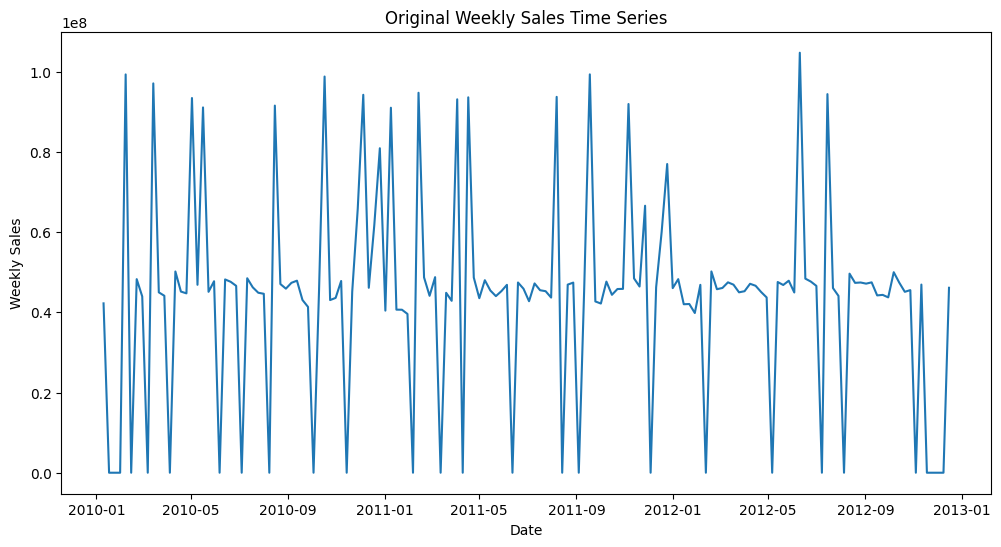

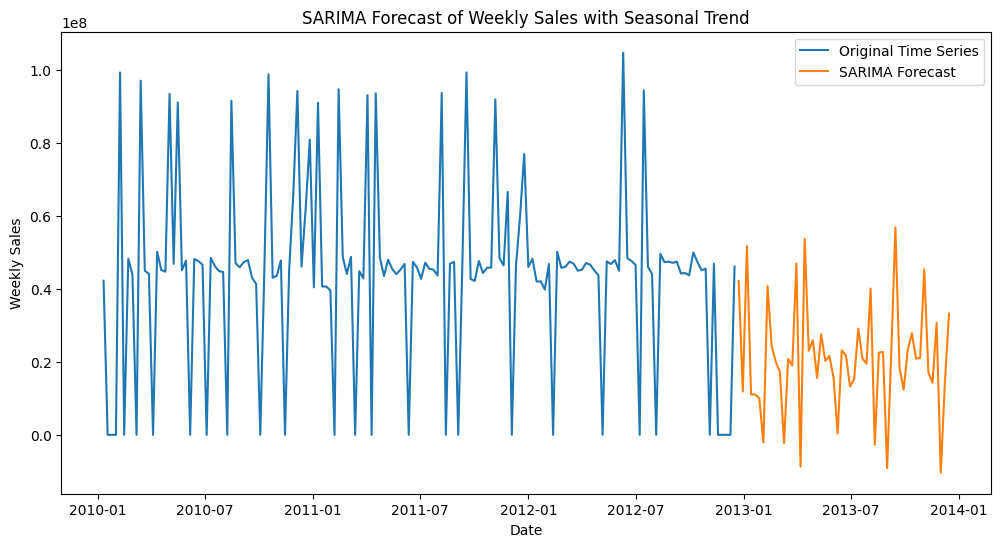

In [ ]:
# Assuming 'Date' and 'Weekly_Sales' columns are present in your DataFrame
time_series_data = data[['Date', 'Weekly_Sales']].copy()

# Set 'Date' as the index
time_series_data.set_index('Date', inplace=True)

# Resample the data to weekly frequency
weekly_sales = time_series_data['Weekly_Sales'].resample('W').sum()

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales)
plt.title('Original Weekly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# SARIMA model
sarima_order = (1, 1, 1, 52)  # Example order, you may need to tune this based on your data
sarima_model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))  # Assuming weekly seasonality

sarima_result = sarima_model.fit(disp=False)

# Forecasting
forecast_steps = 52  # Number of steps to forecast (adjust as needed)
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Original Time Series')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast')
plt.title('SARIMA Forecast of Weekly Sales with Seasonal Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


23:25:53 - cmdstanpy - INFO - Chain [1] start processing
23:25:54 - cmdstanpy - INFO - Chain [1] done processing


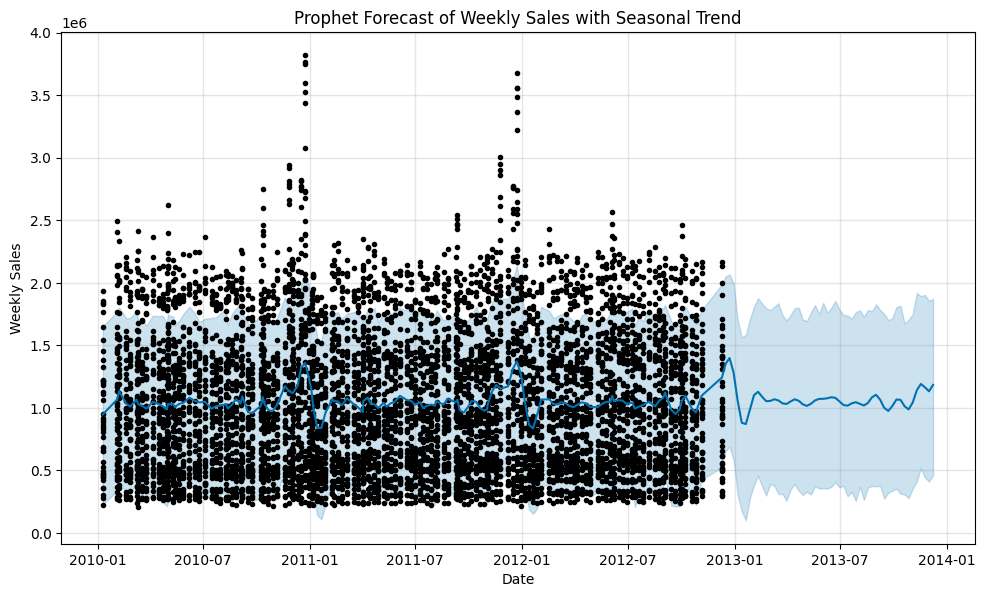

In [ ]:
#Assuming 'Date' and 'Weekly_Sales' columns are present in your DataFrame
data_prophet = data[['Date', 'Weekly_Sales']].copy()
data_prophet.columns = ['ds', 'y']  # Rename columns to match Prophet's expected format

# Create and fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(data_prophet)

# Create a future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=52, freq='W')  # Forecasting for the next 52 weeks

# Make predictions
forecast = prophet_model.predict(future)

# Plotting the forecast
fig = prophet_model.plot(forecast)
plt.title('Prophet Forecast of Weekly Sales with Seasonal Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


23:31:08 - cmdstanpy - INFO - Chain [1] start processing
23:31:09 - cmdstanpy - INFO - Chain [1] done processing


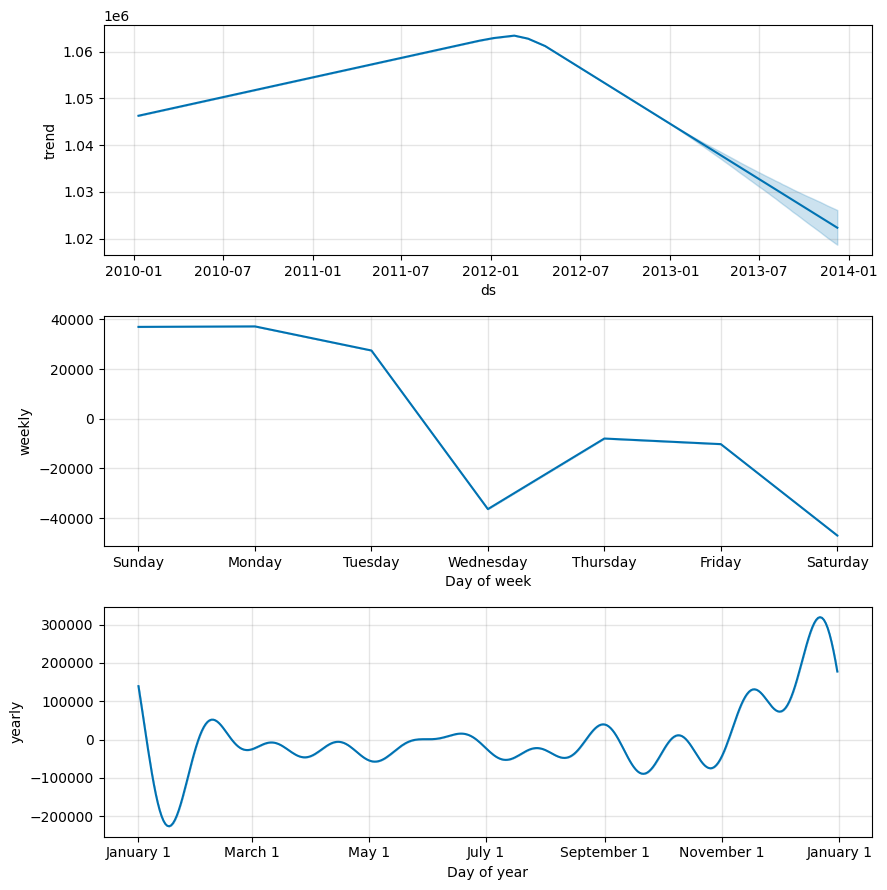

In [ ]:
# Assuming 'Date' and 'Weekly_Sales' columns are present in your DataFrame
data_prophet = data[['Date', 'Weekly_Sales']].copy()
data_prophet.columns = ['ds', 'y']  # Rename columns to match Prophet's expected format

# Create and fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(data_prophet)

# Create a future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=52, freq='W')  # Forecasting for the next 52 weeks

# Make predictions
forecast = prophet_model.predict(future)

# Plot the components
fig = prophet_model.plot_components(forecast)
plt.show()


In [ ]:
#Yearly Seasonality: Seasonal Peak is around December end while the Seasonal Trough is just after new year in January 1-10th. 

#Weekly Seasonality: Lowest Sales happen in Wednesday while the highest Sales happen in Sunday

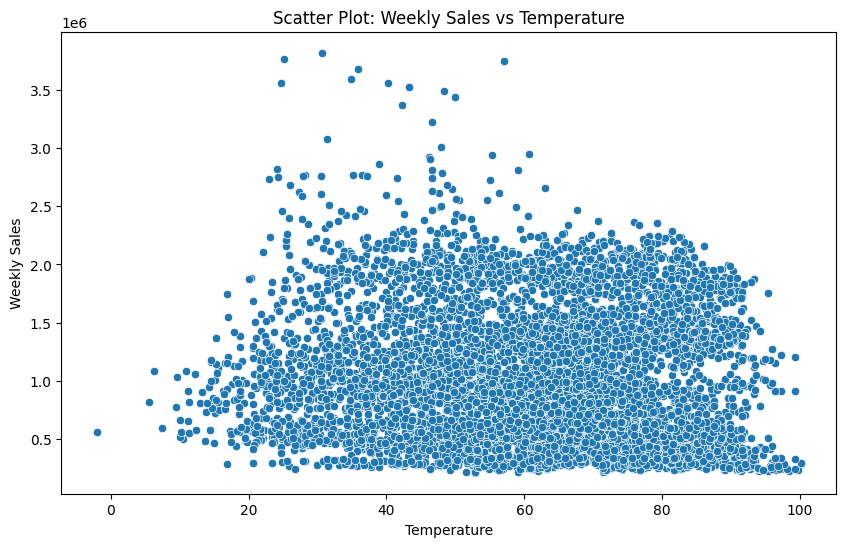

Correlation between Weekly Sales and Temperature: -0.0638100131794696


In [ ]:

# Assuming 'Temperature' and 'Weekly_Sales' columns are present in your DataFrame

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Scatter Plot: Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation analysis
correlation = data['Weekly_Sales'].corr(data['Temperature'])
print(f'Correlation between Weekly Sales and Temperature: {correlation}')


In [ ]:
#There is no clear trend although the highest sales have happened 20-60 degrees
#Further Correlation between Weekly Sales and Temperature: -0.063 which indicates 'Weak Negative Correlation'

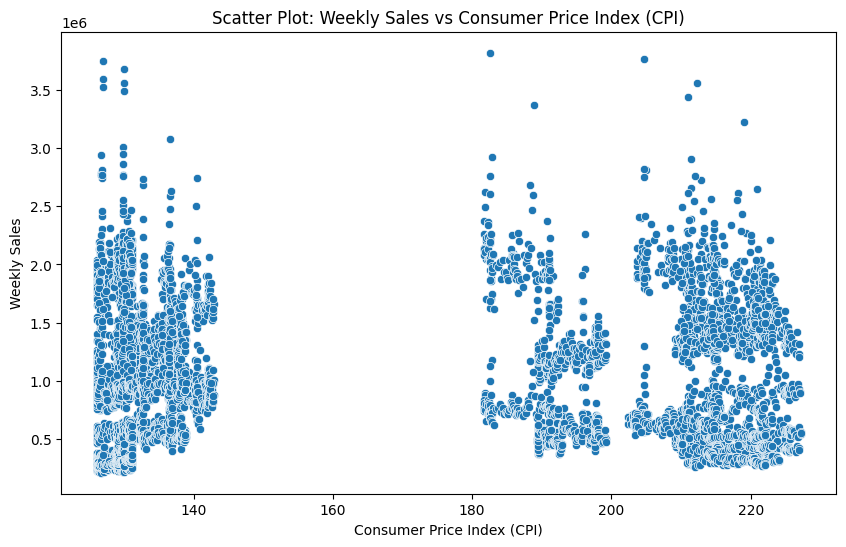

Correlation between Weekly Sales and CPI: -0.07263416204017631


In [ ]:

# Assuming 'CPI' and 'Weekly_Sales' columns are present in your DataFrame

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('Scatter Plot: Weekly Sales vs Consumer Price Index (CPI)')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

# Correlation analysis
correlation = data['Weekly_Sales'].corr(data['CPI'])
print(f'Correlation between Weekly Sales and CPI: {correlation}')


In [ ]:
#There is no clear trend although the Weekly Sales after CPI of 140 seems to fall and then start at above 180
#Further Correlation between Weekly Sales and Temperature: -0.073 which indicates 'Weak Negative Correlation'

In [ ]:
# Assuming 'Store' and 'Weekly_Sales' columns are present in your DataFrame

# Calculate total weekly sales for each store
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()

# Convert numeric values to per 1000
total_sales_by_store_per_1000 = total_sales_by_store / 1000

# Set display format to show exact sales figures
pd.options.display.float_format = '{:.2f}'.format

# Get the top-performing stores (adjust the number as needed)
top_stores_per_1000 = total_sales_by_store_per_1000.nlargest(5)  # Change 5 to the desired number of top stores

# Print the top-performing stores
print("Top Performing Stores (Sales per 1000):")
print(top_stores_per_1000)


Top Performing Stores (Sales per 1000):
Store
20   301397.79
4    299543.95
14   288999.91
13   286517.70
2    275382.44
Name: Weekly_Sales, dtype: float64


In [ ]:
# Assuming 'Store' and 'Weekly_Sales' columns are present in your DataFrame

# Calculate total weekly sales for each store
total_sales_by_store = data.groupby('Store')['Weekly_Sales'].sum()

# Find the worst-performing store
worst_store = total_sales_by_store.idxmin()
worst_sales = total_sales_by_store.min()

# Find the best-performing store
best_store = total_sales_by_store.idxmax()
best_sales = total_sales_by_store.max()

# Calculate the difference between the highest and lowest performing stores
difference = best_sales - worst_sales

# Print the results
print(f"Worst Performing Store: {worst_store}, Sales: {worst_sales}")
print(f"Best Performing Store: {best_store}, Sales: {best_sales}")
print(f"Difference between Highest and Lowest Performing Stores: {difference}")


Worst Performing Store: 33, Sales: 37160221.96
Best Performing Store: 20, Sales: 301397792.46
Difference between Highest and Lowest Performing Stores: 264237570.49999997


In [ ]:
# Assuming 'Date' and 'Weekly_Sales' columns are present in your DataFrame
data_prophet = data[['Date', 'Weekly_Sales']].copy()
data_prophet.columns = ['ds', 'y']  # Rename columns to match Prophet's expected format

# Create and fit a Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.fit(data_prophet)

# Create a future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=12, freq='W')  # Forecasting for the next 12 weeks

# Make predictions
forecast = prophet_model.predict(future)

# Extracting forecast for the next 12 weeks
forecast_next_12_weeks = forecast[['ds', 'yhat']].tail(12)

# Print the forecast for the next 12 weeks
print("Sales Forecast for the Next 12 Weeks:")
print(forecast_next_12_weeks)


00:04:19 - cmdstanpy - INFO - Chain [1] start processing
00:04:20 - cmdstanpy - INFO - Chain [1] done processing


Sales Forecast for the Next 12 Weeks:
            ds       yhat
143 2012-12-16 1350937.06
144 2012-12-23 1398943.86
145 2012-12-30 1280752.99
146 2013-01-06 1054744.10
147 2013-01-13  881335.85
148 2013-01-20  870713.83
149 2013-01-27  986817.10
150 2013-02-03 1101862.00
151 2013-02-10 1129188.80
152 2013-02-17 1088941.71
153 2013-02-24 1053443.55
154 2013-03-03 1055929.07


In [ ]:

# Assuming 'Date' and 'Weekly_Sales' columns are present in your DataFrame
data_sarima = data[['Date', 'Weekly_Sales']].copy()
data_sarima.columns = ['ds', 'y']  # Rename columns to match SARIMA's expected format

# Set 'ds' as the index
data_sarima.set_index('ds', inplace=True)

# Fit a SARIMA model
sarima_order = (1, 1, 1, 52)  # Example order, you may need to tune this based on your data
sarima_model = SARIMAX(data_sarima['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))  # Assuming weekly seasonality

sarima_result = sarima_model.fit(disp=False)

# Forecasting for the next 12 weeks
forecast_steps = 12
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)

# Create a DataFrame with dates and predicted sales
forecast_dates = pd.date_range(start=data_sarima.index[-1], periods=forecast_steps + 1, freq='W')[1:]
sarima_forecast_df = pd.DataFrame({'ds': forecast_dates, 'predicted_sales': sarima_forecast.predicted_mean.values})
sarima_forecast_df.set_index('ds', inplace=True)

# Print the forecast for the next 12 weeks with dates
print("Sales Forecast for the Next 12 Weeks (SARIMA):")
print(sarima_forecast_df)


Sales Forecast for the Next 12 Weeks (SARIMA):
            predicted_sales
ds                         
2012-11-04        813441.46
2012-11-11        794423.07
2012-11-18        775272.07
2012-11-25        943053.82
2012-12-02        835106.41
2012-12-09        865196.31
2012-12-16        903235.82
2012-12-23       1073960.40
2012-12-30        791052.96
2013-01-06        781593.58
2013-01-13        726230.62
2013-01-20        730281.21
